Average Fall Time (micro seconds)

203.48

Average Time Constant(micro seconds)

92.60773893118527

Standard Deviation of Fall Time (micro seconds)

1.3658696863171105

Standard Deviation Time Constant (micro seconds)

0.6216340835682863

Standard Error of Fall Time (micro seconds)

0.6108354934022746

Prediction 1 appears to describe the data best 

The 5.3 plot is signifficantly more informative, we can more easily differentiate the differences between the models to decipher which is most accurate for the data recorded. Additionally on this plot we can easily see some potential error in our last few data points, that would have been undetected if we only inspected plot 5.2 


According to Plot 5.4. The predictions were fairly accurate, this was evident as our least accurate data point was still within ~0.20 volts from its expected theoretical value.

According to this plot(5.4), Prediction 1 fits our data points the best still. In terms of determining the accuracy of our models, this

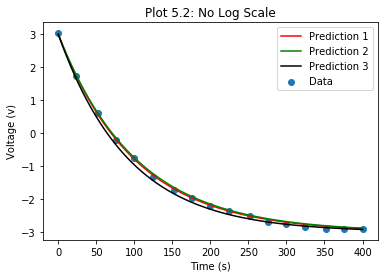

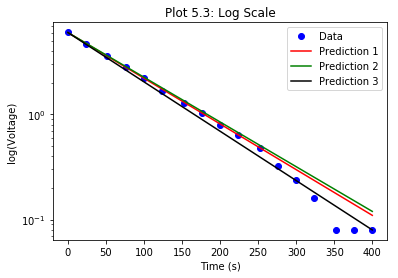

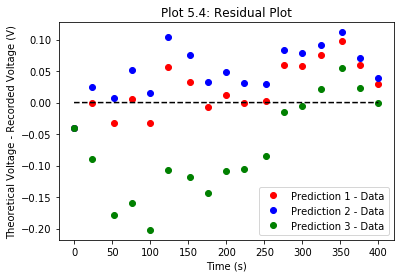

In [28]:
# THINGS TO CHANGE: SCALE ON VOLTAGE MEASUREMENTS (CHECK oscilloscope) AND AXIS TITLES AND THEORETICAL MODELS


import numpy as np

import matplotlib.pyplot as plt
import math

fall_time = np.array([205,203.6,204.4,201.0,203.4]) # Data: FALL TIME

AVG=np.average(fall_time)
print("Average Fall Time (micro seconds)\n")
print(AVG)

AVG_TIME_CONSTANT = AVG / 2.197224577
print("\nAverage Time Constant(micro seconds)\n")
print(AVG_TIME_CONSTANT)

StdDev=np.std(fall_time)
print("\nStandard Deviation of Fall Time (micro seconds)\n")
print(StdDev)

StdDev_TIME_CONSTANT = StdDev/ 2.197224577
print("\nStandard Deviation Time Constant (micro seconds)\n")
print(StdDev_TIME_CONSTANT)

StdErr = (StdDev / (pow(5.0,0.5)))
print("\nStandard Error of Fall Time (micro seconds)\n")
print(StdErr)

# Time and Voltage Arrays
time = np.array([0,24,52,76,100,124,152,176,200,224,252,276,300,324,352,376,400]) #Microseconds
voltage = np.array([3.04,1.72,.60,-.20,-.76,-1.32,-1.72,-1.96,-2.20,-2.36,-2.52,-2.68,-2.76,-2.84,-2.92,-2.92,-2.92]) #mV

LOWER = 0.0
UPPER = 400 
dx = 0.0001

# Constants to be used
e = 2.718281828
v_source = 6.00
TimeConstant2 = 102.2 # Measured Time Constant
TimeConstant1 = 100 # Theoretical Time Constant
TimeConstant3 = 92.61 # Time Constant via Oscilloscope






x1 = np.arange(0, UPPER, dx)
y1 = v_source * pow(e,(-x1/TimeConstant1)) - 3.00 #Theoretical Models
y2 = v_source * pow(e,(-x1/TimeConstant2)) - 3.00
y3 = v_source * pow(e,(-x1/TimeConstant3)) - 3.00

y1log = v_source * pow(e,(-x1/TimeConstant1)) #Theoretical Models for Log plots (Shifted to avoid - values)
y2log = v_source * pow(e,(-x1/TimeConstant2)) 
y3log = v_source * pow(e,(-x1/TimeConstant3))


time_log = time 
voltage_log = voltage + 3.00




plt.figure()
plt.scatter(time,voltage, label = "Data") # GRAPH IN mV, microseconds
plt.plot(x1,y1, color = 'red', label = 'Prediction 1') # Theoretical Values for R and C
plt.plot(x1,y2, color = 'green',label = 'Prediction 2') # Measured R-C Values
plt.plot(x1,y3, color = 'black',label = 'Prediction 3') # Oscilloscope Model
plt.title('Plot 5.2: No Log Scale')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (v)')
plt.legend()

plt.figure()
plt.semilogy(time_log,voltage_log,"bo", label = 'Data')
plt.semilogy(x1,y1log, color = 'red', label = 'Prediction 1')  # Theoretical Values for R and C
plt.semilogy(x1,y2log, color = 'green',label = 'Prediction 2') # Measured R-C Values
plt.semilogy(x1,y3log, color = 'black',label = 'Prediction 3') # Oscilloscope Model
plt.title('Plot 5.3: Log Scale')
plt.xlabel('Time (s)')
plt.ylabel('log(Voltage)')
plt.legend()
print('\nPrediction 1 appears to describe the data best \n')
print('The 5.3 plot is signifficantly more informative, we can more easily differentiate the differences between the models to decipher which is most accurate for the data recorded. Additionally on this plot we can easily see some potential error in our last few data points, that would have been undetected if we only inspected plot 5.2 \n')


Diff_Array1 = (v_source * pow(e,(-time/TimeConstant1)) - 3.00) - voltage # Prediction 1
Diff_Array2 = (v_source * pow(e,(-time/TimeConstant2)) - 3.00) - voltage # Prediction 2
Diff_Array3 = (v_source * pow(e,(-time/TimeConstant3)) - 3.00) - voltage # Prediction 3
zero = 0 *x1

plt.figure()
plt.plot(time,Diff_Array1,"ro", label = 'Prediction 1 - Data') 
plt.plot(time,Diff_Array2,"bo", label = "Prediction 2 - Data")
plt.plot(time,Diff_Array3,"go", label = "Prediction 3 - Data")
plt.plot(x1,zero,'--',color = 'black')
plt.title('Plot 5.4: Residual Plot')
plt.xlabel('Time (s)')
plt.ylabel('Theoretical Voltage - Recorded Voltage (V)')
plt.legend()


print('\nAccording to Plot 5.4. The predictions were fairly accurate, this was evident as our least accurate data point was still within ~0.20 volts from its expected theoretical value.\n')

print('According to this plot(5.4), Prediction 1 fits our data points the best still. In terms of determining the accuracy of our models, this plot is more helpful than the previous two as we can more easily read off the difference between the theoretical expectations and recorded data')
